  0%|          | 0/60000 [00:00<?, ?it/s]

Max-Min of load image:  255 0
Shape:  (256, 256)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of sobel image:  tensor(3.9971, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(3.8510, device='cuda:0') tensor(-3.0353, device='cuda:0')
Max-Min of sobel-y image:  tensor(3.9804, device='cuda:0') tensor(-3.3804, device='cuda:0')


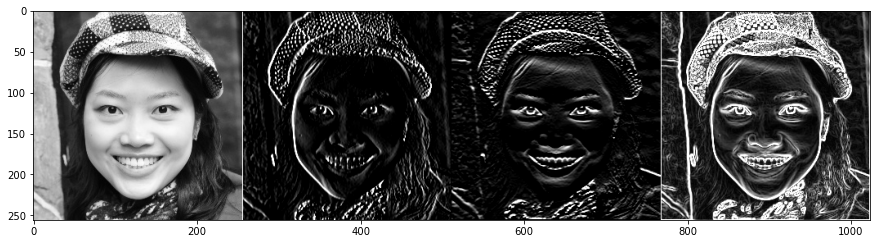

  0%|          | 1/60000 [00:03<63:58:37,  3.84s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of load image:  241 0
Shape:  (256, 256)
Max-Min of sobel image:  tensor(2.4283, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(1.5882, device='cuda:0') tensor(-2.2039, device='cuda:0')
Max-Min of sobel-y image:  tensor(1.9137, device='cuda:0') tensor(-1.5020, device='cuda:0')


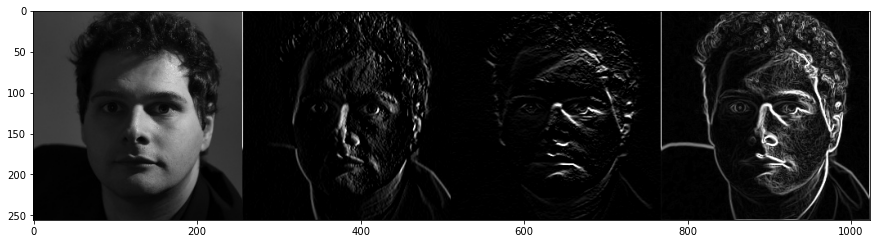

  0%|          | 2/60000 [00:03<27:43:11,  1.66s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of load image:  245 1
Shape:  (256, 256)
Max-Min of sobel image:  tensor(2.2688, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(1.9020, device='cuda:0') tensor(-2.1137, device='cuda:0')
Max-Min of sobel-y image:  tensor(1.6824, device='cuda:0') tensor(-1.8471, device='cuda:0')


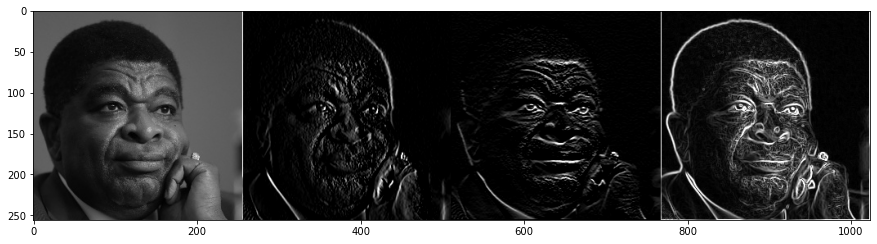

  0%|          | 3/60000 [00:04<16:08:32,  1.03it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of load image:  254 6
Shape:  (256, 256)
Max-Min of sobel image:  tensor(3.6471, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(3.6471, device='cuda:0') tensor(-3.4078, device='cuda:0')
Max-Min of sobel-y image:  tensor(3.2588, device='cuda:0') tensor(-3.5490, device='cuda:0')


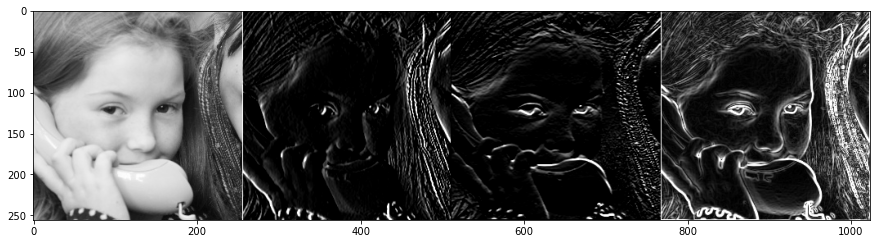

  0%|          | 4/60000 [00:04<10:43:57,  1.55it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of load image:  223 0
Shape:  (256, 256)
Max-Min of sobel image:  tensor(3.6770, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(3.0118, device='cuda:0') tensor(-3.4471, device='cuda:0')
Max-Min of sobel-y image:  tensor(3.4471, device='cuda:0') tensor(-3.1098, device='cuda:0')


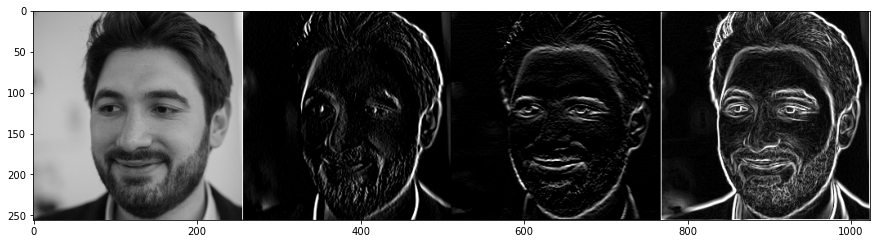

  0%|          | 5/60000 [00:04<7:49:37,  2.13it/s] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of load image:  247 0
Shape:  (256, 256)
Max-Min of sobel image:  tensor(4.0985, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(3.8588, device='cuda:0') tensor(-2.5843, device='cuda:0')
Max-Min of sobel-y image:  tensor(3.8588, device='cuda:0') tensor(-2.0118, device='cuda:0')


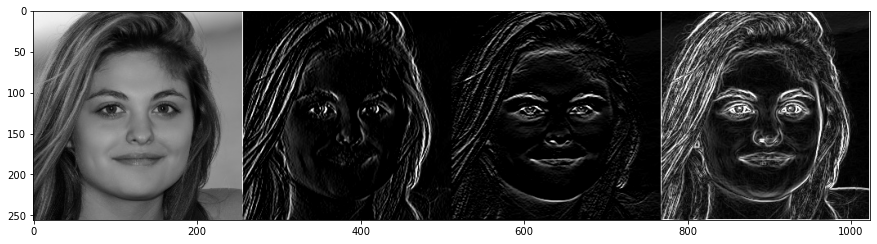

  0%|          | 6/60000 [00:04<5:59:39,  2.78it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of load image:  255 2
Shape:  (256, 256)
Max-Min of sobel image:  tensor(4.2371, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(3.8314, device='cuda:0') tensor(-3.9922, device='cuda:0')
Max-Min of sobel-y image:  tensor(4., device='cuda:0') tensor(-1.9412, device='cuda:0')


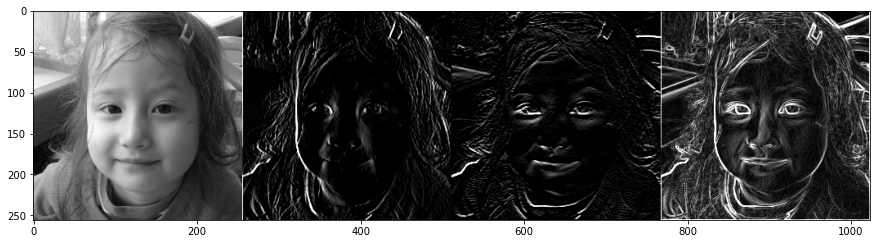

  0%|          | 7/60000 [00:04<4:51:30,  3.43it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of load image:  255 6
Shape:  (256, 256)
Max-Min of sobel image:  tensor(3.9844, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(3.0314, device='cuda:0') tensor(-3.0471, device='cuda:0')
Max-Min of sobel-y image:  tensor(2.8314, device='cuda:0') tensor(-3.9843, device='cuda:0')


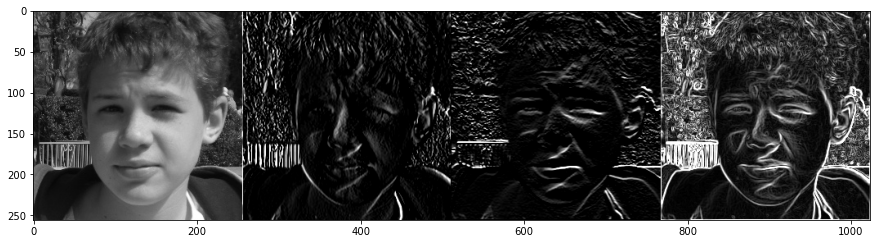

  0%|          | 8/60000 [00:04<4:06:10,  4.06it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of load image:  246 0
Shape:  (256, 256)
Max-Min of sobel image:  tensor(3.8118, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(3.1922, device='cuda:0') tensor(-3.1843, device='cuda:0')
Max-Min of sobel-y image:  tensor(3.2275, device='cuda:0') tensor(-3.8118, device='cuda:0')


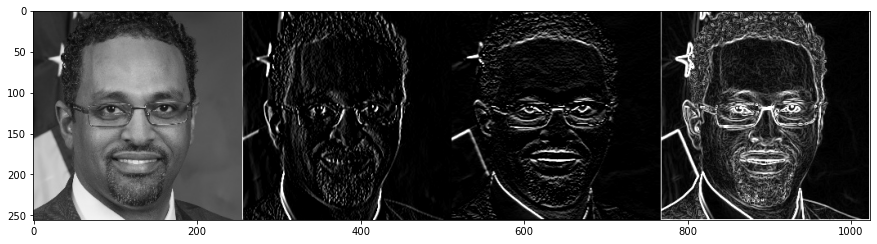

  0%|          | 9/60000 [00:05<3:36:20,  4.62it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of load image:  255 0
Shape:  (256, 256)
Max-Min of sobel image:  tensor(3.9986, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(2.8588, device='cuda:0') tensor(-3.7804, device='cuda:0')
Max-Min of sobel-y image:  tensor(2.7098, device='cuda:0') tensor(-3.8275, device='cuda:0')


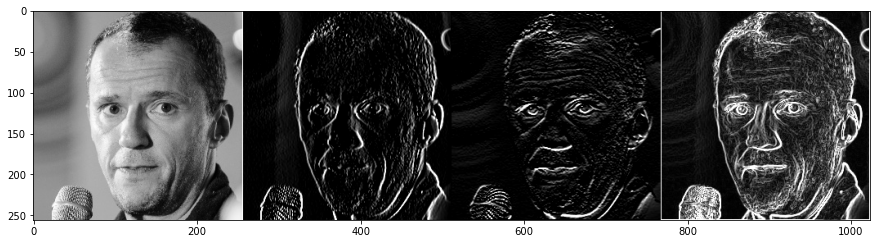

  0%|          | 10/60000 [00:05<3:15:44,  5.11it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max-Min of load image:  232 0
Shape:  (256, 256)
Max-Min of sobel image:  tensor(3.4960, device='cuda:0') tensor(0.0010, device='cuda:0')
Max-Min of sobel-x image:  tensor(2.5098, device='cuda:0') tensor(-2.0314, device='cuda:0')
Max-Min of sobel-y image:  tensor(2.5765, device='cuda:0') tensor(-3.4941, device='cuda:0')


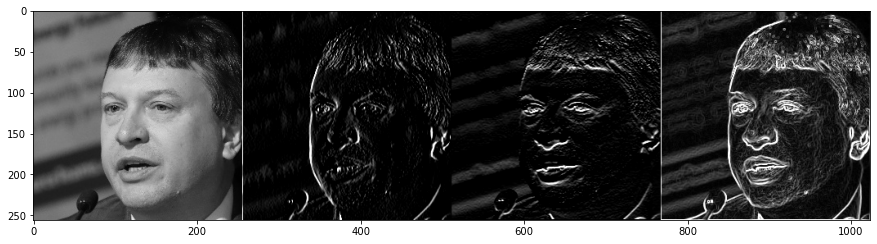

  0%|          | 10/60000 [00:05<8:51:53,  1.88it/s]


In [1]:

import torch as th
import numpy as np
import pickle
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
from pytorch_lightning import seed_everything
import torch as th
import tqdm
import os, glob

set_ = 'train'
img_file = glob.glob(f"/data/mint/DPM_Dataset/ffhq_256_with_anno/ffhq_256/{set_}/*.jpg")
img_size = 256
import cv2
from PIL import Image
import blobfile as bf

def sobel_edge(image, device='cuda'):
    # image is in [B, 1, H, W] format
    assert image.shape[1] == 1
    
    sobel_x = th.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=th.float32).to(device)
    sobel_y = th.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=th.float32).to(device)

    # Apply Sobel operators to compute gradients
    gradient_x = F.conv2d(image, sobel_x.view(1, 1, 3, 3), padding='same')
    gradient_y = F.conv2d(image, sobel_y.view(1, 1, 3, 3), padding='same')

    # Compute the magnitude of the gradient
    gradient_magnitude = th.sqrt((gradient_x**2 + gradient_y**2) + 1e-6)
    # gradient_magnitude = th.sqrt(th.clamp((gradient_x**2 + gradient_y**2), 0.0) + 1e-6)

    return gradient_x, gradient_y, gradient_magnitude

mode = 'L'
for i, path in enumerate(tqdm.tqdm(img_file)):
    name = path.split('/')[-1].split('.')[0]
    with bf.BlobFile(path, "rb") as f:
        pil_image = Image.open(f)
        pil_image.load()
    pil_image = pil_image.convert(mode)
    print("Max-Min of load image: ", np.max(np.array(pil_image)), np.min(np.array(pil_image)))
    print("Shape: ", np.array(pil_image).shape)
    img = np.array(pil_image) / 255
    img = img[None, ..., None]
    img = th.from_numpy(img).permute(0, 3, 1, 2).float().cuda()
    gx, gy, gmag = sobel_edge(img)
    print("Max-Min of sobel image: ", th.max(gmag), th.min(gmag))
    print("Max-Min of sobel-x image: ", th.max(gx), th.min(gx))
    print("Max-Min of sobel-y image: ", th.max(gy), th.min(gy))
    # Visualize all gradients
    plt.figure(figsize=(15, 15))
    plt.imshow(th.cat((img[0], gx[0], gy[0], gmag[0]), dim=2).cpu().permute(1, 2, 0).repeat(1, 1, 3))
    plt.show()
    if i == 10: break
    